In [1]:
import numpy as np
import torch

import torchvision
import torchvision.transforms as T

import matplotlib.pyplot as plt
from IPython import display

In [2]:
# Import the dataset
data = torchvision.datasets.CIFAR10(root='cifar10', download=True)
print(data)

100.0%


Extracting cifar10/cifar-10-python.tar.gz to cifar10
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: cifar10
    Split: Train


In [5]:
print(f"Data Shape: {data.data.shape}")
print(f"Classes: {data.classes}")
print(f"Length of Total Target Vals: {len(data.targets)}")

Data Shape: (50000, 32, 32, 3)
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Length of Total Target Vals: 50000


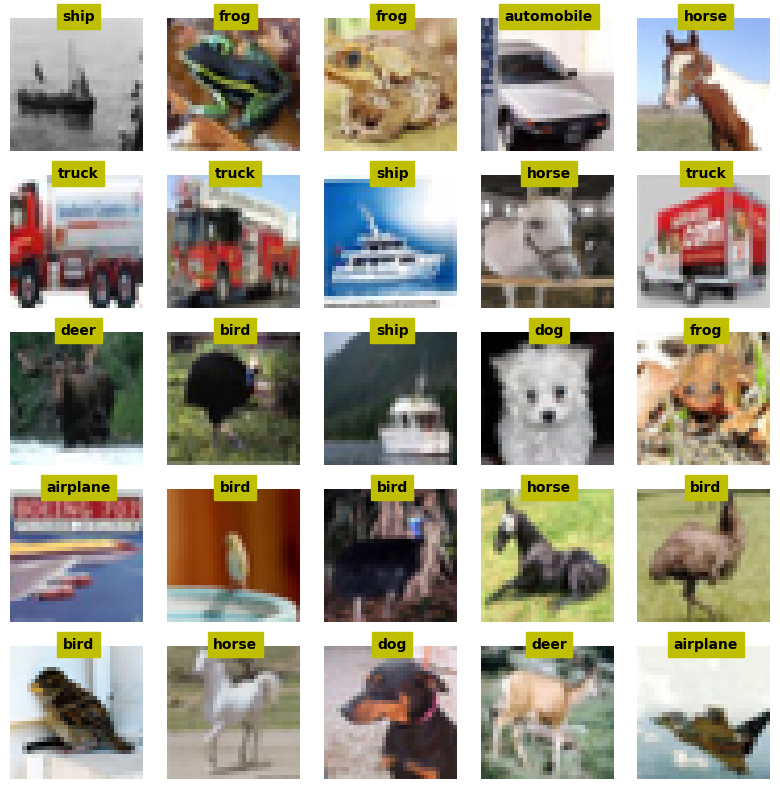

In [7]:
# Inspect a random sample of images
fig, axs = plt.subplots(5, 5, figsize=(8, 8))

for ax in axs.flatten():

    rand_id = np.random.choice(len(data.targets))

    img = data.data[rand_id, :, :, :]
    label = data.classes[data.targets[rand_id]]

    ax.imshow(img)
    ax.text(16, 0, label, ha='center', fontweight='bold', color='k', backgroundcolor='y')
    ax.axis('off')

plt.tight_layout()
plt.show()

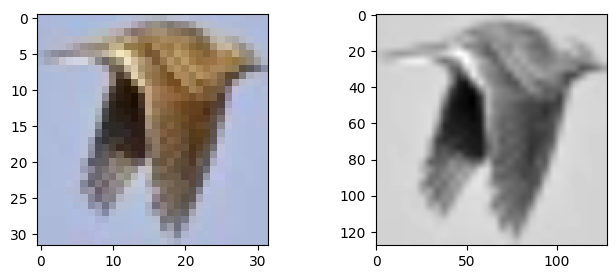

In [11]:
# Create and apply transform
Ts = T.Compose([ T.ToTensor(),
                 T.Resize(32*4),
                 T.Grayscale(num_output_channels=1)
                ])

data.transform = Ts

transformed_img = data.transform(data.data[123, :, :, :])

fig, ax = plt.subplots(1, 2, figsize=(8, 3))
ax[0].imshow(data.data[123, :, :, :])
ax[1].imshow(torch.squeeze(transformed_img), cmap='gray')